In [2]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg


# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

#Import Iris dataset
iris = datasets.load_iris()

In [31]:
df = yf.download(tickers='BTC-USD LTC-USD ETH-USD',start = '2021-08-28', end='2021-09-02',interval='5m')

[*********************100%***********************]  3 of 3 completed


In [32]:
df.head()

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48352.585938  3240.808350  174.098923   
2021-08-27 19:40:00+01:00  48339.988281  3236.539307  173.850739   
2021-08-27 19:45:00+01:00  48373.410156  3237.888428  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3235.765625  173.860413   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48352.585938  3240.808350  174.098923   
2021-08-27 19:40:00+01:00  48339.988281  3236.539307  173.850739   
2021-08-27 19:45:00+01:00  48373.410156  3237.888428  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3235.765625  173.860413   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48359.296875  3241.444336  174.198776   
2021-08-27 19:40:00+01:00  48343.703125  3240.337402  173.895248   
2021-08-27 19:45:00+01:00  48378.964844  3239.100586  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3236.806396  173.860413   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48293.410156  3239.009521  174.067719   
2021-08-27 19:35:00+01:00  48341.093750  3240.808350  174.029861   
2021-08-27 19:40:00+01:00  48325.742188  3236.539307  173.820938   
2021-08-27 19:45:00+01:00  48336.417969  3236.952148  173.777023   
2021-08-27 19:50:00+01:00  48352.808594  3235.765625  173.807404   

                                   Open                             Volume  \
                                BTC-USD      ETH-USD     LTC-USD   BTC-USD   
Datetime                                                                     
2021-08-27 19:30:00+01:00  48315.218750  3240.088379  174.112289         0   
2021-08-27 19:35:00+01:00  48341.093750  3241.139160  174.198776  55857152   
2021-08-27 19:40:00+01:00  48343.703125  3240.337402  173.895248  25886720   
2021-08-27 19:45:00+01:00  48336.417969  3236.952148  173.777023  52756480   
2021-08-27 19:50:00+01:00  48353.992188  3236.806396  173.807404  38367232   

                                             
                           ETH-USD  LTC-USD  
Datetime                                     
2021-08-27 19:30:00+01:00        0        0  
2021-08-27 19:35:00+01:00  5033984   615424  
2021-08-27 19:40:00+01:00        0        0  
2021-08-27 19:45:00+01:00  8654848  3099648  
2021-08-27 19:50:00+01:00        0        0

In [33]:
df.tail()

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.726562  180.179108   
2021-09-01 19:20:00+01:00  48807.257812  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48741.675781  3718.330566  180.187927   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.726562  180.179108   
2021-09-01 19:20:00+01:00  48807.257812  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48741.675781  3718.330566  180.187927   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.827637   
2021-09-01 19:15:00+01:00  48912.371094  3720.797363  180.190002   
2021-09-01 19:20:00+01:00  48820.203125  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48771.046875  3722.136719  180.189560   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:05:00+01:00  48809.054688  3707.263916  179.207977   
2021-09-01 19:10:00+01:00  48838.222656  3709.897461  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.291016  179.778503   
2021-09-01 19:20:00+01:00  48807.257812  3715.133057  180.179840   
2021-09-01 19:25:00+01:00  48741.675781  3717.934082  180.163940   

                                   Open                             Volume  \
                                BTC-USD      ETH-USD     LTC-USD   BTC-USD   
Datetime                                                                     
2021-09-01 19:05:00+01:00  48809.054688  3707.263916  179.207977  20287488   
2021-09-01 19:10:00+01:00  48838.222656  3709.897461  179.827637  72589312   
2021-09-01 19:15:00+01:00  48912.371094  3720.797363  179.778503  15757312   
2021-09-01 19:20:00+01:00  48812.445312  3715.133057  180.179840  19951616   
2021-09-01 19:25:00+01:00  48755.906250  3719.644775  180.163940  13651968   

                                               
                            ETH-USD   LTC-USD  
Datetime                                       
2021-09-01 19:05:00+01:00  30230528   4504832  
2021-09-01 19:10:00+01:00  41768960   9407232  
2021-09-01 19:15:00+01:00   6320128  11454464  
2021-09-01 19:20:00+01:00  17895424   8194560  
2021-09-01 19:25:00+01:00         0   2055424

In [34]:
df

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48352.585938  3240.808350  174.098923   
2021-08-27 19:40:00+01:00  48339.988281  3236.539307  173.850739   
2021-08-27 19:45:00+01:00  48373.410156  3237.888428  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3235.765625  173.860413   
...                                 ...          ...         ...   
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.726562  180.179108   
2021-09-01 19:20:00+01:00  48807.257812  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48741.675781  3718.330566  180.187927   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48352.585938  3240.808350  174.098923   
2021-08-27 19:40:00+01:00  48339.988281  3236.539307  173.850739   
2021-08-27 19:45:00+01:00  48373.410156  3237.888428  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3235.765625  173.860413   
...                                 ...          ...         ...   
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.726562  180.179108   
2021-09-01 19:20:00+01:00  48807.257812  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48741.675781  3718.330566  180.187927   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48317.406250  3240.695557  174.132019   
2021-08-27 19:35:00+01:00  48359.296875  3241.444336  174.198776   
2021-08-27 19:40:00+01:00  48343.703125  3240.337402  173.895248   
2021-08-27 19:45:00+01:00  48378.964844  3239.100586  174.083298   
2021-08-27 19:50:00+01:00  48356.492188  3236.806396  173.860413   
...                                 ...          ...         ...   
2021-09-01 19:05:00+01:00  48833.511719  3708.501709  179.554123   
2021-09-01 19:10:00+01:00  48865.710938  3715.948975  179.827637   
2021-09-01 19:15:00+01:00  48912.371094  3720.797363  180.190002   
2021-09-01 19:20:00+01:00  48820.203125  3717.249023  180.337418   
2021-09-01 19:25:00+01:00  48771.046875  3722.136719  180.189560   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-08-27 19:30:00+01:00  48293.410156  3239.009521  174.067719   
2021-08-27 19:35:00+01:00  48341.093750  3240.808350  174.029861   
2021-08-27 19:40:00+01:00  48325.742188  3236.539307  173.820938   
2021-08-27 19:45:00+01:00  48336.417969  3236.952148  173.777023   
2021-08-27 19:50:00+01:00  48352.808594  3235.765625  173.807404   
...                                 ...          ...         ...   
2021-09-01 19:05:00+01:00  48809.054688  3707.263916  179.207977   
2021-09-01 19:10:00+01:00  48838.222656  3709.897461  179.774811   
2021-09-01 19:15:00+01:00  48803.316406  3717.291016  179.778503   
2021-09-01 19:20:00+01:00  48807.257812  3715.133057  180.179840   
2021-09-01 19:25:00+01:00  48741.675781  3717.934082  180.163940   

                                   Open                             Volume  \
                                BTC-USD      ETH-USD     LTC-USD   BTC-USD   
Datetime                                                      

In [35]:
df.to_csv('data123.csv')

In [36]:
df.to_csv('data123.csv',index=True)

In [37]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv')

In [38]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv',index = True)

In [39]:
data = pd.read_csv("data123.csv")

In [40]:
data.to_excel("data123.xlsx",index = None,header=True)

In [22]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
import statistics
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as rg
from sklearn.model_selection import train_test_split
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")


In [23]:
df = pd.read_excel(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data.xlsx')

In [24]:
print(df)

            Date            Time  BTC-USD Adj Close  ETH-USD Adj Close  \
0     2021-07-01  00:00:00+01:00       34984.894531        2260.587402   
1     2021-07-01  00:05:00+01:00       35017.734375        2260.957275   
2     2021-07-01  00:10:00+01:00       35081.628906        2267.362061   
3     2021-07-01  00:15:00+01:00       35042.652344        2266.119629   
4     2021-07-01  00:20:00+01:00       35007.921875        2263.348389   
...          ...             ...                ...                ...   
17879 2021-09-01  19:05:00+01:00       48833.511719        3708.501709   
17880 2021-09-01  19:10:00+01:00       48865.710938        3715.948975   
17881 2021-09-01  19:15:00+01:00       48803.316406        3717.726562   
17882 2021-09-01  19:20:00+01:00       48807.257812        3717.249023   
17883 2021-09-01  19:25:00+01:00       48741.675781        3718.330566   

       LTC-USD Adj Close  BTC-USD Close  ETH-USD Close  LTC-USD Close  \
0             143.405853   34984.89453

In [25]:
data = pd.DataFrame(df)

In [26]:
data

,Date,Time,BTC-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,BTC-USD Close,ETH-USD Close,LTC-USD Close,BTC-USD High,ETH-USD High,LTC-USD High,BTC-USD Low,ETH-USD Low,LTC-USD Low,BTC-USD Open,ETH-USD Open,LTC-USD Open,BTC-USD Volume,ETH-USD Volume,LTC-USD Volume
0,2021-07-01,00:00:00+01:00,34984.894531,2260.587402,143.405853,34984.894531,2260.587402,143.405853,34994.214844,2263.345215,143.656815,34822.152344,2254.167480,143.205429,34822.152344,2254.167480,143.205429,0,0,0
1,2021-07-01,00:05:00+01:00,35017.734375,2260.957275,143.584885,35017.734375,2260.957275,143.584885,35024.238281,2261.180420,143.584885,34956.550781,2257.223145,143.309036,34956.550781,2257.223145,143.309036,24279040,0,0
2,2021-07-01,00:10:00+01:00,35081.628906,2267.362061,143.986786,35081.628906,2267.362061,143.986786,35111.433594,2267.613037,143.986786,35056.144531,2264.155518,143.709229,35056.144531,2264.155518,143.709229,164657152,120766464,83584
3,2021-07-01,00:15:00+01:00,35042.652344,2266.119629,143.898438,35042.652344,2266.119629,143.898438,35092.296875,2268.981445,144.069901,35040.175781,2266.040527,143.884781,35092.296875,2268.981445,144.069901,132653056,131840000,0
4,2021-07-01,00:20:00+01:00,35007.921875,2263.348389,143.712845,35007.921875,2263.348389,143.712845,35042.984375,2267.707764,143.896057,35007.921875,2261.504639,143.712845,35034.816406,2265.564697,143.896057,30140416,15161344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17879,2021-09-01,19:05:00+01:00,48833.511719,3708.501709,179.554123,48833.511719,3708.501709,179.554123,48833.511719,3708.501709,179.554123,48809.054688,3707.263916,179.207977,48809.054688,3707.263916,179.207977,20287488,30230528,4504832
17880,2021-09-01,19:10:00+01:00,48865.710938,3715.948975,179.774811,48865.710938,3715.948975,179.774811,48865.710938,3715.948975,179.827637,48838.222656,3709.897461,179.774811,48838.222656,3709.897461,179.827637,72589312,41768960,9407232
17881,2021-09-01,19:15:00+01:00,48803.316406,3717.726562,180.179108,48803.316406,3717.726562,180.179108,48912.371094,3720.797363,180.190002,48803.316406,3717.291016,179.778503,48912.371094,3720.797363,179.778503,15757312,6320128,11454464
17882,2021-09-01,19:20:00+01:00,48807.257812,3717.249023,180.337418,48807.257812,3717.249023,180.337418,48820.203125,3717.249023,180.337418,48807.257812,3715.133057,180.179840,48812.445312,3715.133057,180.179840,19951616,17895424,8194560


# BTC_USD

In [63]:
BTC = df[['BTC-USD Adj Close']]
BTC

,BTC-USD Adj Close
0,34984.894531
1,35017.734375
2,35081.628906
3,35042.652344
4,35007.921875
...,...
17879,48833.511719
17880,48865.710938
17881,48803.316406
17882,48807.257812


Text(0.5, 1.0, 'BTC-USD Adj Close')

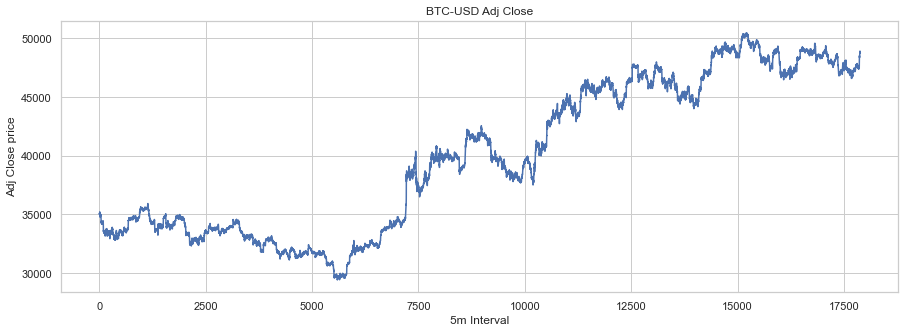

In [64]:
data['BTC-USD Adj Close'].plot(figsize=(15,5))
plt.xlabel("5m Interval")
plt.ylabel("Adj Close price")
plt.title("BTC-USD Adj Close")

## Augmented Dickey- Fuller Test - BTC-USD Adj Close 

In [65]:
#Augmented Dickey-Filler Test - 
X = data["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.459946
p-value: 0.899599
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Difference time series BTC-USD

In [68]:
BTC_stationary = BTC.diff().dropna()
BTC_stationary

,BTC-USD Adj Close
1,32.839844
2,63.894531
3,-38.976562
4,-34.730469
5,-9.753906
...,...
17879,52.617188
17880,32.199219
17881,-62.394531
17882,3.941406


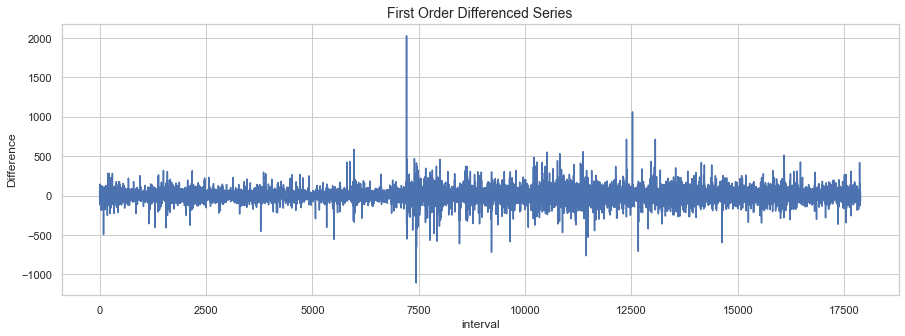

In [72]:
plt.figure(figsize=(15, 5))
plt.plot(BTC_stationary)
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [ ]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTC['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

## Augmented Dickey-Fuller Test after difference

In [78]:
X = BTC_stationary["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -40.180696
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time series in stationary


# LTC-USD

In [ ]:
LTC = df[['Date','LTC-USD Adj Close']]
LTC

In [ ]:
data['LTC-USD Adj Close'].plot(figsize=(13,5),color = 'orange')
plt.xlabel("5m Intervel")
plt.ylabel("Adj Close price")
plt.title("LTC-USD Adj Close")

## Augmented Dickey-Fuller Test - LTC_USD Adj Close

In [32]:
#Augmented Dickey-Filler Test - 
X = data["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.796621
p-value: 0.820113
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [33]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTC['LTC-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(LTC)

NameError: name 'LTC' is not defined

# ETH-USD

In [34]:
ETH = df[['Date','ETH-USD Adj Close']]
ETH

,Date,ETH-USD Adj Close
0,2021-07-01,2260.587402
1,2021-07-01,2260.957275
2,2021-07-01,2267.362061
3,2021-07-01,2266.119629
4,2021-07-01,2263.348389
...,...,...
17879,2021-09-01,3708.501709
17880,2021-09-01,3715.948975
17881,2021-09-01,3717.726562
17882,2021-09-01,3717.249023


Text(0.5, 1.0, 'ETH-USD Adj Close')

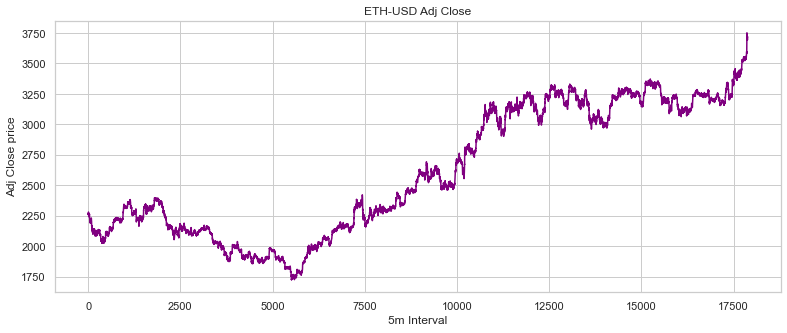

In [35]:
data['ETH-USD Adj Close'].plot(figsize=(13,5), color = 'purple')
plt.xlabel("5m Interval")
plt.ylabel("Adj Close price")
plt.title("ETH-USD Adj Close")

## Augmented Dickey- Fuller Test ETH-USD Adj Close

In [36]:
#Augmented Dickey-Filler Test - 
X = data["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: 0.338056
p-value: 0.979025
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [37]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETH['ETH-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(ETH)

 KPSS Statistics:4.8655079036340325
 p-value: 0.01
 num lags: 44
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [38]:
data1 = df[['BTC-USD Adj Close','LTC-USD Adj Close']]
data1

,BTC-USD Adj Close,LTC-USD Adj Close
0,34984.894531,143.405853
1,35017.734375,143.584885
2,35081.628906,143.986786
3,35042.652344,143.898438
4,35007.921875,143.712845
...,...,...
17879,48833.511719,179.554123
17880,48865.710938,179.774811
17881,48803.316406,180.179108
17882,48807.257812,180.337418


In [39]:
data2 = df[['LTC-USD Adj Close','ETH-USD Adj Close']]
data2

,LTC-USD Adj Close,ETH-USD Adj Close
0,143.405853,2260.587402
1,143.584885,2260.957275
2,143.986786,2267.362061
3,143.898438,2266.119629
4,143.712845,2263.348389
...,...,...
17879,179.554123,3708.501709
17880,179.774811,3715.948975
17881,180.179108,3717.726562
17882,180.337418,3717.249023


In [40]:
data3 = df[['ETH-USD Adj Close','BTC-USD Adj Close']]
data3

,ETH-USD Adj Close,BTC-USD Adj Close
0,2260.587402,34984.894531
1,2260.957275,35017.734375
2,2267.362061,35081.628906
3,2266.119629,35042.652344
4,2263.348389,35007.921875
...,...,...
17879,3708.501709,48833.511719
17880,3715.948975,48865.710938
17881,3717.726562,48803.316406
17882,3717.249023,48807.257812


In [41]:
data4 = df[['Date','BTC-USD Adj Close','LTC-USD Adj Close','ETH-USD Adj Close']]
data4.round(3)

,Date,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
0,2021-07-01,34984.895,143.406,2260.587
1,2021-07-01,35017.734,143.585,2260.957
2,2021-07-01,35081.629,143.987,2267.362
3,2021-07-01,35042.652,143.898,2266.120
4,2021-07-01,35007.922,143.713,2263.348
...,...,...,...,...
17879,2021-09-01,48833.512,179.554,3708.502
17880,2021-09-01,48865.711,179.775,3715.949
17881,2021-09-01,48803.316,180.179,3717.727
17882,2021-09-01,48807.258,180.337,3717.249


In [42]:
data4.corr().round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,1.00,0.95,0.98
LTC-USD Adj Close,0.95,1.00,0.96
ETH-USD Adj Close,0.98,0.96,1.00


In [43]:
#Returns
BTC_returns = np.log(data4['BTC-USD Adj Close']/data4['BTC-USD Adj Close'].shift(1))
BTC_returns

0             NaN
1        0.000938
2        0.001823
3       -0.001112
4       -0.000992
           ...   
17879    0.001078
17880    0.000659
17881   -0.001278
17882    0.000081
17883   -0.001345
Name: BTC-USD Adj Close, Length: 17884, dtype: float64

In [42]:
LTC_returns = np.log(data4['LTC-USD Adj Close']/data4['LTC-USD Adj Close'].shift(1))
LTC_returns

0             NaN
1        0.001248
2        0.002795
3       -0.000614
4       -0.001291
           ...   
17879    0.001120
17880    0.001228
17881    0.002246
17882    0.000878
17883   -0.000829
Name: LTC-USD Adj Close, Length: 17884, dtype: float64

In [43]:
ETH_returns = np.log(data4['ETH-USD Adj Close']/data4['ETH-USD Adj Close'].shift(1))
ETH_returns

0             NaN
1        0.000164
2        0.002829
3       -0.000548
4       -0.001224
           ...   
17879    0.000644
17880    0.002006
17881    0.000478
17882   -0.000128
17883    0.000291
Name: ETH-USD Adj Close, Length: 17884, dtype: float64

In [44]:
#Correlation 
corrM = data4.corr()
corrM.round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,1.00,0.95,0.98
LTC-USD Adj Close,0.95,1.00,0.96
ETH-USD Adj Close,0.98,0.96,1.00


In [45]:
#Covariance
data4.cov().round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,41872624.39,136790.84,3345762.39
LTC-USD Adj Close,136790.84,491.97,11252.43
ETH-USD Adj Close,3345762.39,11252.43,280557.22


In [46]:
data4.describe().round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
count,17884.00,17884.00,17884.00
mean,39936.62,149.09,2607.17
std,6470.91,22.18,529.68
min,29393.92,104.33,1722.51
25%,33596.39,133.04,2131.45
50%,39713.69,141.93,2476.85
75%,46420.76,171.85,3167.98
max,50461.30,190.99,3750.38


# Training and Testing

## BTC - LTC Pairs

In [51]:
int1 = data1.loc[:,['BTC-USD Adj Close','LTC-USD Adj Close']]

In [53]:
#Training and testing range
tint1 = int1[:2021-8-11]
tint1.columns = ['BTC-USD Adj Close','LTC-USD Adj Close']
fint1 = int1[2021-8-12:]
fint1.columns = ['BTC-USD Adj Close','LTC-USD Adj Close']

In [79]:
tbtc = tint1['BTC-USD Adj Close']
tltc = tint1['LTC-USD Adj Close']
rtbtc = tbtc.pct_change(1).dropna()
rtltc = tltc.pct_change(1).dropna()


In [80]:
print('')
print('BTC-LTC Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtbtc).join(rtltc).corr(), 3))
print('')


BTC-LTC Returns Correlation

                   BTC-USD Adj Close  LTC-USD Adj Close
BTC-USD Adj Close              1.000              0.863
LTC-USD Adj Close              0.863              1.000



No handles with labels found to put in legend.
No handles with labels found to put in legend.


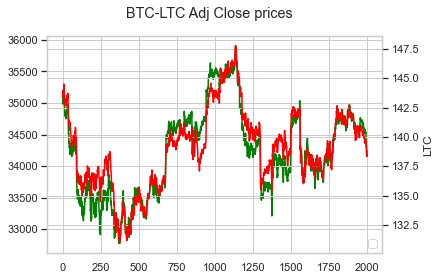

In [81]:
fig1,ax1 = plt.subplots()
ax1.plot(tbtc, color = 'green')
ax1.legend(loc='lower left')
ax2 = ax1.twinx()
ax2.plot(tltc,color = 'red')
ax1.legend(loc='lower right')
plt.ylabel('LTC')
plt.xlabel('BTC')
plt.suptitle('BTC-LTC Adj Close prices')
plt.show()


### BTC-LTC spread calculation

In [83]:
tintsp1 = tbtc -rg.OLS(tbtc,tltc).fit().params[0]*tltc

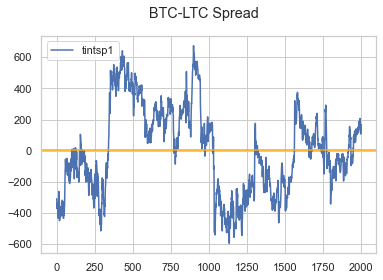

In [86]:
fig2, ax = plt.subplots()
ax.plot(tintsp1, label='tintsp1')
ax.axhline(tintsp1.mean(), color='orange')
ax.legend(loc='upper left')
plt.suptitle('BTC-LTC Spread')
plt.show()

In [88]:
print('== AUS Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tbtc, trend='ct'))
print('')
print('== CAN Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tltc, trend='ct'))
print('')

== AUS Prices Augmented Dickey-Fuller Test ==



NameError: name 'at' is not defined

In [429]:
#Training and testing range
tint1 = data2[:2021-8-17]
tint1.columns = ['LTC-USD Adj Close','ETH-USD Adj Close']
fint1 = data2[2021-7-13:]
fint1.columns = ['LTC-USD Adj Close','ETH-USD Adj Close']

In [430]:
tdge= tint1['LTC-USD Adj Close']
teth = tint1['ETH-USD Adj Close']
rtdge = tdge.pct_change(1).dropna()
rteth = teth.pct_change(1).dropna()

In [432]:
print('')
print('LTC-ETH Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtdge).join(rteth).corr(), 4))
print('')


LTC-ETH Returns Correlation

                   LTC-USD Adj Close  ETH-USD Adj Close
LTC-USD Adj Close             1.0000             0.8551
ETH-USD Adj Close             0.8551             1.0000



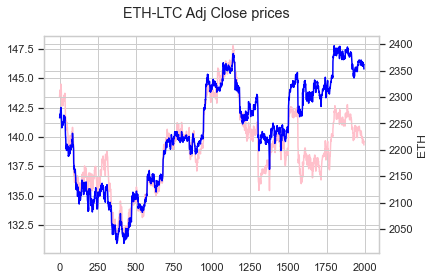

In [434]:
fig1,ax1 = plt.subplots()
ax1.plot(tdge, color = 'pink')
ax2 = ax1.twinx()
ax2.plot(teth,color = 'blue')
plt.ylabel('ETH')
plt.xlabel('LTC')
plt.suptitle('ETH-LTC Adj Close prices')
plt.show()


In [435]:
#Training and testing range
tint1 = data3[:2021-8-17]
tint1.columns = ['BTC-USD Adj Close','ETH-USD Adj Close']
fint1 = data3[2021-7-13:]
fint1.columns = ['BTC-USD Adj Close','ETH-USD Adj Close']

In [436]:
teth= tint1['ETH-USD Adj Close']
tbtc = tint1['BTC-USD Adj Close']
rteth = teth.pct_change(1).dropna()
rtbtc = tbtc.pct_change(1).dropna()

In [437]:
print('')
print('ETH-BTC Returns Correlation')
print('')
print(np.round(pd.DataFrame(rteth).join(rtbtc).corr(), 4))
print('')


ETH-BTC Returns Correlation

                   ETH-USD Adj Close  BTC-USD Adj Close
ETH-USD Adj Close             1.0000             0.8611
BTC-USD Adj Close             0.8611             1.0000



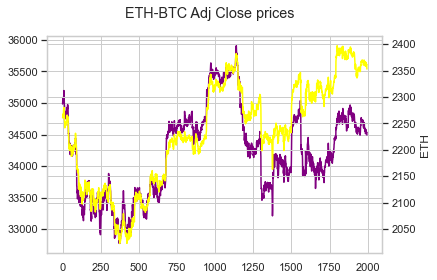

In [438]:
fig1,ax1 = plt.subplots()
ax1.plot(teth, color = 'purple')
ax2 = ax1.twinx()
ax2.plot(tbtc,color = 'yellow')
plt.ylabel('ETH')
plt.xlabel('DOGE')
plt.suptitle('ETH-BTC Adj Close prices')
plt.show()


In [439]:
#Random Walk
tmax = 9886
t = 0
x = [0]
y = [0]
t_total = 0
dist = 0
while t<tmax:
    coord = random.randint(0,100)
    
    if coord == 0:
        direction = random.randint(0,1)
        direction = 2*direction-1
        x.append(x[t]+direction)
        y.append(y[t])
        
    
    else:
        direction =random.randint(0,1)
        direction = 2*direction-1
        y.append(y[t]+direction)
        x.append(x[t])
        
    cur_dist = x[t]*x[t] + y[t]*y[t]
    if cur_dist>dist:
        dist = cur_dist
        
    t = t+1
    
print("max distance was " +  str(math.sqrt(dist))) 
        
    

max distance was 106.73331251301067


In [1]:
#ADF test
